In [1]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import constants

In [2]:
def samplef(x,a,b):
    mean = 0
    std_dev = 0.01
    noise = 1e14*np.random.normal(mean, std_dev, size=x.shape) 
    return (a/x**5)/((np.e**(b/x))-1)+noise

In [3]:
x = np.linspace(1.0e-7,5e-06,1000)
y = samplef(x,1.1303312191047457e-16,3.558695679613733e-06)

In [4]:
from scipy.ndimage import gaussian_filter1d
y= gaussian_filter1d(y, 1.0)

In [5]:
n = x.size
print(n)
print(x[0],x[-1])

1000
1e-07 5e-06


In [6]:
# x = x[:n//2]
# y = y[:n//2]

In [7]:
# #window filter
# def moving_average(x, y, window_size):
#     y_smoothed = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
#     x_smoothed = x[:len(y_smoothed)]  # Adjust the x-values to match the length of y_smoothed
#     return x_smoothed, y_smoothed
# x,y = moving_average(x,y,5)#(2*len(x))//100)

In [8]:
# #remove outliers (z-score)
# mean = np.mean(x)
# std = np.std(x)
# z_scores = np.abs((x - mean) / std)
# x = x[z_scores < 1]
# y = y[z_scores < 1]
# print(n-x.size)

In [9]:
# Q1 = np.percentile(data, 25)
# Q3 = np.percentile(data, 75)
# IQR = Q3 - Q1
# filtered_data = data[(data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 * IQR)]

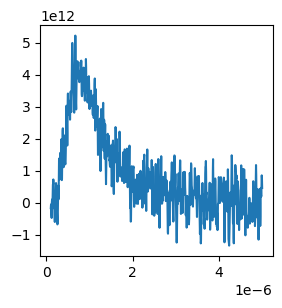

In [10]:
plt.figure(figsize=(3,3))
plt.plot(x,y)
plt.show()

# $B = \frac{2hc^2}{l^5} \frac{1}{e^\frac{hc}{lkT}-1}$

In [11]:
np.max(y)

5223720978182.666

In [12]:
imax = np.argmax(y)
print(imax)

116


In [13]:
xmax = x[imax]
ymax = y[imax]
print(xmax,ymax)

6.689689689689691e-07 5223720978182.666


In [14]:
h = constants.h
c = constants.c
kb = constants.k
c = constants.c
wien = constants.Wien
print(h,c,kb,c,wien)

6.62607015e-34 299792458.0 1.380649e-23 299792458.0 0.002897771955


## $B = \frac{a}{l^5} \frac{1}{e^\frac{b}{l}-1}$

### $a = 2hc^2$
### $b = \frac{hc}{k_bT}$

In [15]:
def f(x,a,b):
    return (a/x**5)/((np.e**(b/x))-1)

In [16]:
T0= wien/xmax
print(T0)

4331.698612965733


In [17]:
b0 = h*c/(kb*T0)
ac = 2*h*(c**2)
print(ac)

1.1910429723971884e-16


In [18]:
a0 = ymax*((np.e**(b0/xmax))-1)*(xmax**5)
print(a0,b0)

9.960721309748641e-17 3.3215073486353732e-06


In [19]:
(a,b), pcov = curve_fit(f,x,y,p0=[a0,b0])
print(a,b)

1.1463826847817997e-16 3.5855382630188395e-06


In [20]:
Tp = h*c/(kb*b)
print(Tp)

4012.7221408942855


#### Predicted temperatures
T1 = 4041.8709686231955   
T2 = 4310.2734965636655  
T3 = 4042.9893045283557  
T4 = 3948.91106182756  

a1 = 1.15e-16  
a2 = 0.77e-16   
a3 = 1.13e-16  
a4 = 1.12e-16

using window filter reduces the accuracy. correct value of a is 1.19e-19   
without filter : 1.13e-19  
with filter (size=5) : 1.06e-16

remove zscore with score=3(common value) doesn't remove any of the data points  
on decreasing to score to 1, 400 points are remoed with decrease in a to 1.05e-19 :(

Using first half of the data doesn't give much improvement, but using second half gives garbage

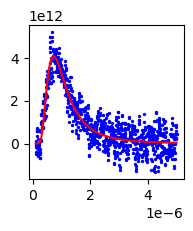

In [21]:
plt.figure(figsize=(2,2))
plt.scatter(x,y,color='blue', label='Data Points',s=2)
plt.plot(x,f(x,a,b),color='red', label='fitted curve')
plt.show()

In [22]:
def f1(x,b):
    a = ac
    return (a/x**5)/((np.e**(b/x))-1)
    # return (a/l**5)/(np.e**(b/(l*T))-1)

In [23]:
from scipy.optimize import curve_fit

In [24]:
b1, pcov = curve_fit(f1,x,y,p0=[b0])

In [25]:
print(ac,b1)

1.1910429723971884e-16 [3.61343919e-06]


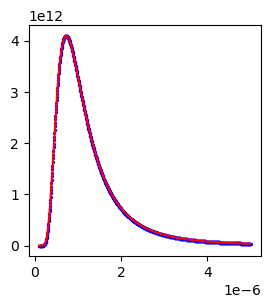

In [26]:
plt.figure(figsize=(3,3))
plt.scatter(x,f(x,a,b),color='blue', label='Data Points',s=2)
plt.plot(x,f1(x,b1),color='red', label='fitted curve')
plt.show()

### T values
d1 = 12337.47253212  
d2 = 8887.2690  
d3 = 12424.09941144   
d4 = 11790.58892269